COULIBALY PEKANRI KADIOLOTCHAN VALY



**<Détectez des émotions dans des photos de visages(colère, joie, tristesse)>**

In [1]:
#monter drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Installation des librairies

In [2]:
# Installation des librairies nécessaires
!pip install numpy
!pip install -Uqq  timm 
!pip install -Uqq fastai

import timm, fastai
fastai.__version__, timm.__version__

('2.7.18', '1.0.12')

### Importation des librairies

In [3]:
# Code pour importer les modules de vision
from fastai.vision.all import *


Création d'un  dataloader à partir des données du dossier `train/`, puis en visualisation d'un lot.

In [26]:
from fastai.vision.all import *

def label_function(x):
    """Retourne le nom de la classe à partir du nom complet du fichier.

    Args:
        x (Path): nom complet du fichier (y compris le chemin)

    Returns:
        str: nom de la classe
    """
    # Convertir x en objet Path si ce n'est pas déjà le cas
    x = Path(x)
    return x.parent.name  # Le nom du dossier parent est la classe

def get_dataloader(path, bs=50):
    """Créé un dataloader à partir des images de `path`.

    Args:
        path (Path): chemin du dossier racine des images
        bs (int, optional): Taille du lot de données (batch size), par défaut 50.

    Returns:
        DataLoaders: dataloader contenant les images d'entraînement et validation avec leurs labels
    """
    # Collectionner tous les fichiers images dans le dossier `path`
    fnames = get_image_files(path)

    # Affichage d'un exemple pour vérifier la fonction de label
    print(f"{fnames[0], label_function(fnames[0])}")

    # Créer le DataLoader à l'aide de `ImageDataLoaders.from_path_func`
    dls = ImageDataLoaders.from_path_func(
        path, fnames, label_func=label_function,
        valid_pct=0.2, seed=121, bs=bs, item_tfms=Resize(224)
    )

    return dls

In [6]:



folder = "/content/drive/MyDrive/deep_learning"
root = Path(folder+'/data/train')
root_extra = Path(folder+'/data/extra')

dls = get_dataloader(root)
dls_extra = get_dataloader(root_extra)

(Path('/content/drive/MyDrive/deep_learning/data/train/colere/image_13.jpg'), 'colere')
(Path('/content/drive/MyDrive/deep_learning/data/extra/joie/image_39.jpg'), 'joie')


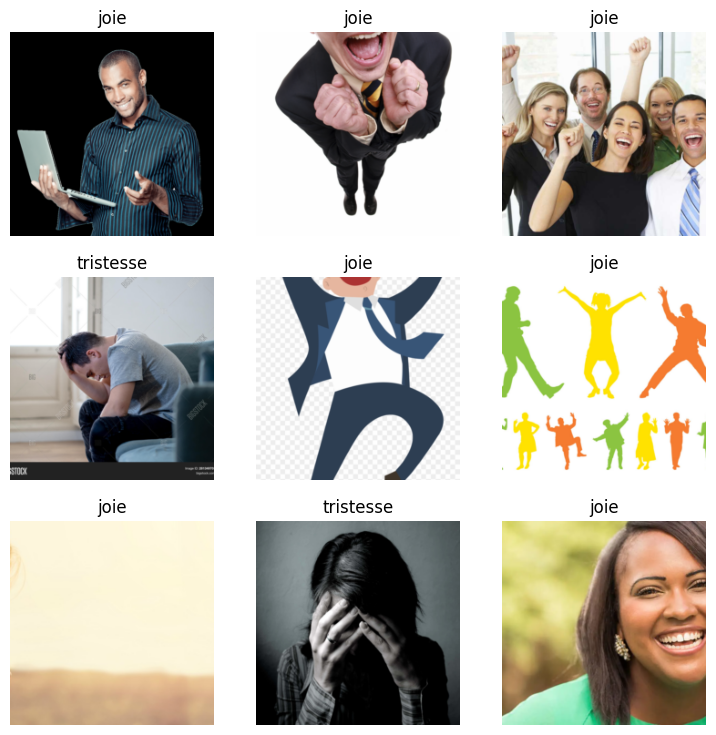

In [5]:
dls.show_batch()


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


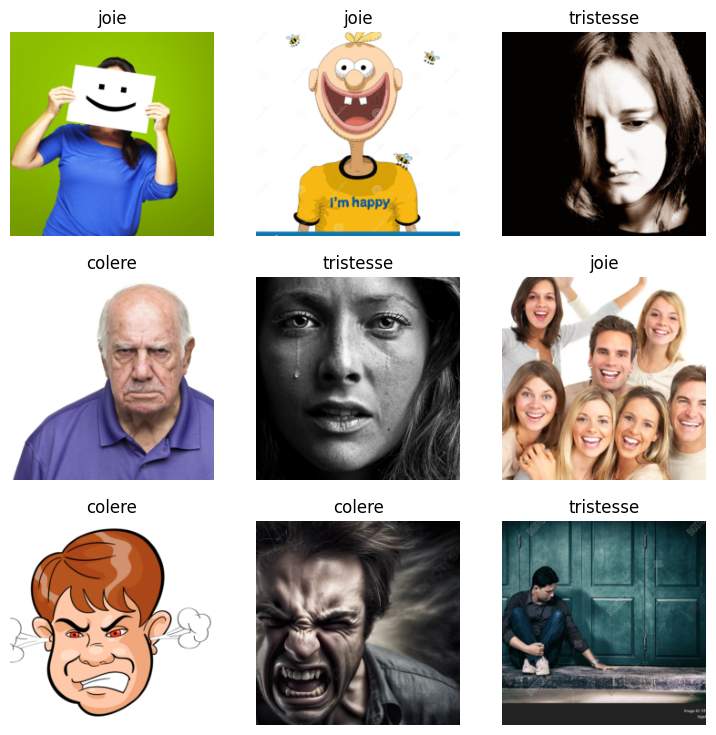

In [7]:
dls_extra.show_batch()

# **I. Développement de modèles en réponse au problème**

1. Entraîner 4 modèles (`resnet50, resnext50_32x4d, xresnet50, efficientnet_b2`) pendant 5 époques en utilisant la technique de l'apprentissage par transfert

In [8]:
training_time = {}
training_perf = {}

In [9]:

import time
start_time = time.time()
learn_r50 =  vision_learner(dls, resnet50, metrics=error_rate, pretrained=True)
learn_r50.fine_tune(5)
end_time = time.time()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 138MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.553782,1.126956,0.301887,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.720175,0.847842,0.264151,00:27
1,0.580783,0.872976,0.292453,00:25
2,0.459988,0.893333,0.235849,00:26
3,0.369533,0.994942,0.254717,00:28
4,0.302097,1.021906,0.273585,00:24


In [10]:
training_time['resnet50'] =end_time - start_time
training_perf['resnet50'] =learn_r50.validate()[1]

In [11]:
learn_r50.save('m-r50')

Path('/content/drive/MyDrive/deep_learning/data/train/models/m-r50.pth')

In [12]:

start_time1 = time.time()
learn_rx50 =  vision_learner(dls, resnext50_32x4d, metrics=error_rate, pretrained=True)
learn_rx50.fine_tune(5)
end_time1 = time.time()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 162MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.528538,1.536355,0.471698,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.696671,1.093715,0.301887,00:24
1,0.564569,1.078087,0.301887,00:27
2,0.492673,1.078465,0.264151,00:29
3,0.398631,1.081199,0.283019,00:24
4,0.338018,1.088713,0.292453,00:28


In [13]:
training_time['resnext50_32x4d'] = end_time1 - start_time1
training_perf['resnext50_32x4d'] = learn_rx50.validate()[1]

In [14]:
learn_rx50.save('m-rx50')

Path('/content/drive/MyDrive/deep_learning/data/train/models/m-rx50.pth')

In [15]:

start_time2 = time.time()
learn_xr50 =  vision_learner(dls, xresnet50, metrics=error_rate, pretrained=True)
learn_xr50.fine_tune(5)
end_time2 = time.time()

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth
100%|██████████| 244M/244M [00:05<00:00, 51.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.756285,1.781756,0.556604,00:26


epoch,train_loss,valid_loss,error_rate,time
0,1.096373,1.315762,0.575472,00:26
1,0.977992,1.254708,0.433962,00:27
2,0.923137,1.216587,0.443396,00:24
3,0.816840,1.058230,0.415094,00:26
4,0.723705,1.020691,0.377359,00:30


In [16]:
learn_xr50.save('m-xr50')

Path('/content/drive/MyDrive/deep_learning/data/train/models/m-xr50.pth')

In [17]:
training_time['learn_xr50'] = end_time2 - start_time2
training_perf['learn_xr50'] = learn_xr50.validate()[1]

In [18]:

start_time3 = time.time()
learn_efnb2 =  vision_learner(dls, efficientnet_b2, metrics=error_rate, pretrained=False)
learn_efnb2.fine_tune(5)
end_time3 = time.time()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.911614,1.219859,0.679245,00:28


epoch,train_loss,valid_loss,error_rate,time
0,1.543952,1.291551,0.650943,00:24
1,1.647022,1.125171,0.650943,00:26
2,1.620875,1.200586,0.679245,00:24
3,1.536483,1.297686,0.669811,00:27
4,1.515921,1.155502,0.669811,00:26


In [19]:
learn_efnb2.save('m-efnb2')

Path('/content/drive/MyDrive/deep_learning/data/train/models/m-efnb2.pth')

In [20]:
training_time['learn_efnb2'] = end_time3 - start_time3
training_perf['learn_efnb2'] = learn_efnb2.validate()[1]

## **II. Analyse des modèles développés**


Text(0, 0.5, 'secondes')

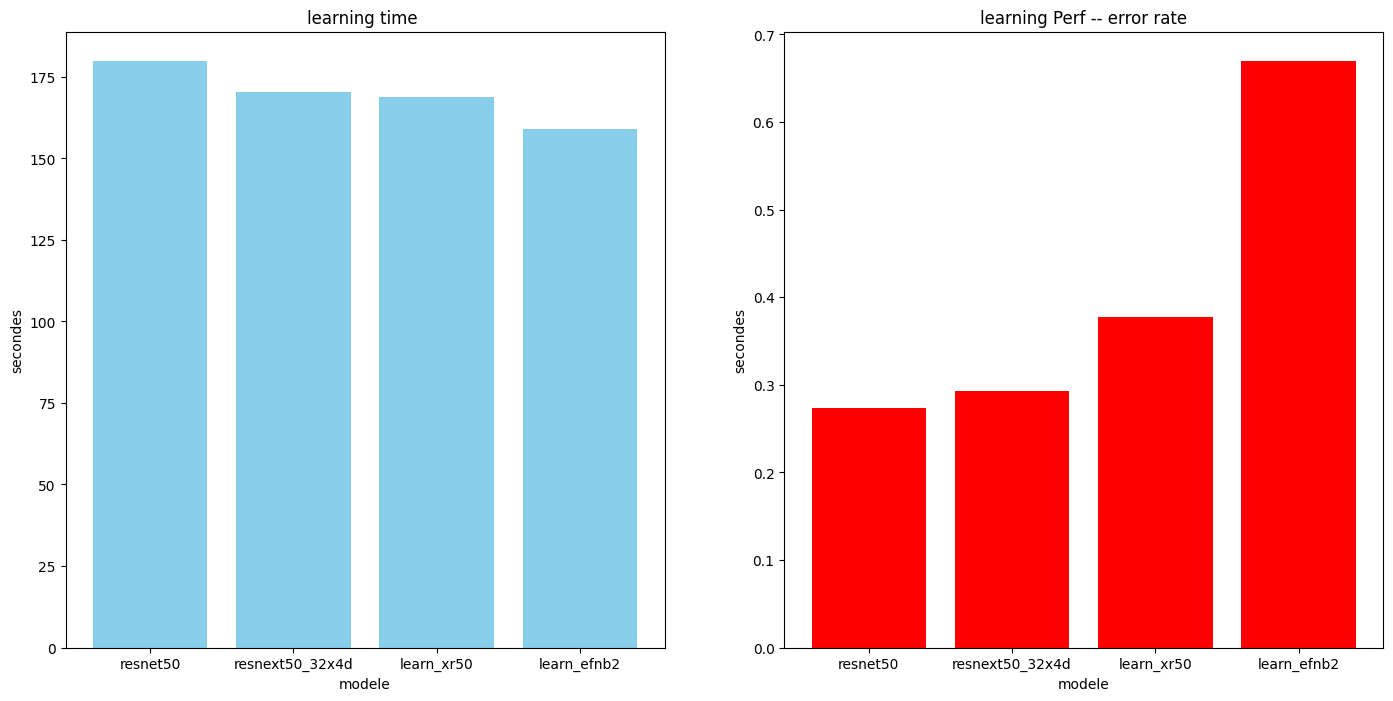

In [21]:
# Code pour les graphes

import matplotlib.pyplot as plt

plt.figure(figsize = (17,8))

plt.subplot(1,2,1)
plt.bar(list(training_time.keys()), list(training_time.values()), color = "skyblue")
plt.title("learning time ")
plt.xlabel("modele")
plt.ylabel("secondes")

plt.subplot(1,2,2)
plt.bar(list(training_perf.keys()), list(training_perf.values()), color = "red")
plt.title("learning Perf -- error rate")
plt.xlabel("modele")
plt.ylabel("secondes")

3. le modèle le plus rapide pour l'entraînement est</br>

`<leam_efnb2>`
</br>

4. le modèle le plus performant est</br>

`<resnet50>`
</br>



## **III. Amélioration du modèle le plus performant**

In [22]:
learn_best = vision_learner(dls, resnet50, metrics=error_rate, pretrained=True)
n_epochs = 50
learn_best.fit_one_cycle(n_epochs)

epoch,train_loss,valid_loss,error_rate,time
0,2.079930,1.385962,0.669811,00:28
1,1.864145,1.076182,0.518868,00:25
2,1.603081,0.907445,0.415094,00:23
3,1.445277,0.870241,0.367925,00:25
4,1.270513,0.907251,0.339623,00:27
5,1.076149,0.899618,0.320755,00:26
6,0.933861,0.909680,0.292453,00:23
7,0.793318,0.930861,0.264151,00:26
8,0.670969,0.950100,0.283019,00:23
9,0.584306,0.999305,0.264151,00:25


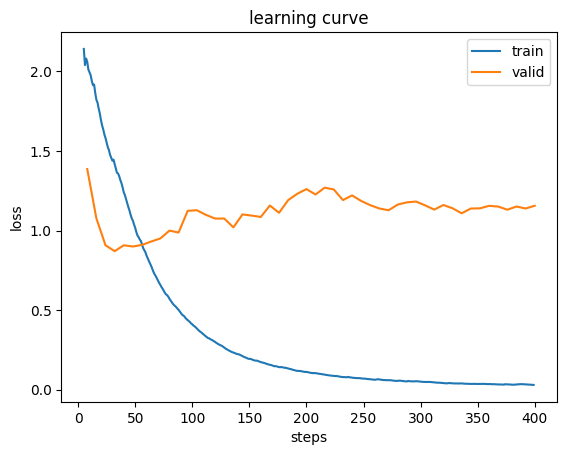

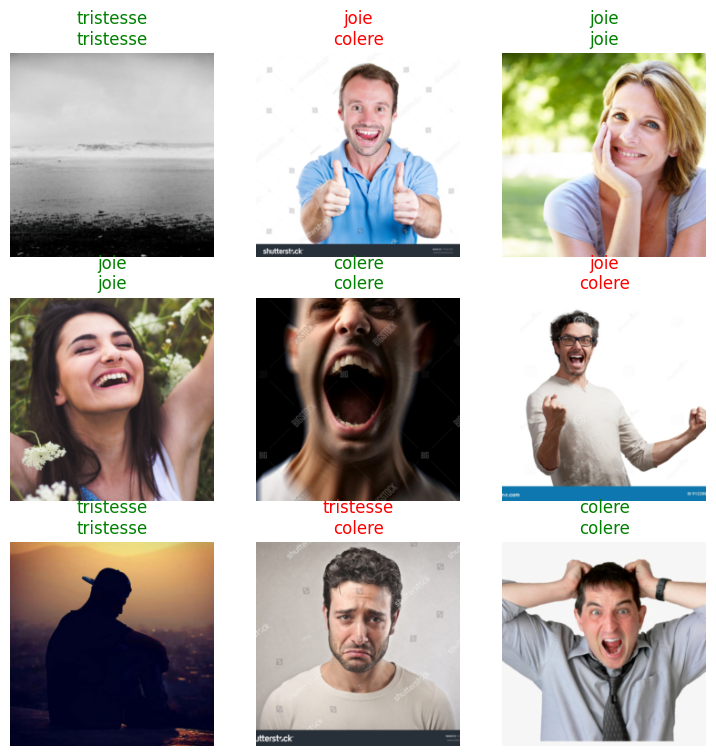

In [23]:
# la courbe d'apprentissage du meilleur modèle
# la courbe d'apprentissage selon les epoch

learn_best.recorder.plot_loss()
learn_best.show_results()

l'époque avant laquelle la
performance a une tendance globale à se dégrader (augmentation du loss de la validation).</br>

In [27]:
n_epoch_best_perf = np.argmin(learn_best.recorder.losses)
#n_epoch_best_perf=14

## **IV. Evaluation finale**




In [28]:
# Collection des fichiers images
fnames_extra =  get_image_files(root_extra)
# Détermination de leur label
labels = [label_function(x) for x in fnames_extra]

In [29]:

# Initialiser une liste vide pour stocker les prédictions
predictions = []
predictions_proba = []

# Parcourir tous les fichiers d'image
for file in fnames_extra:
    # Ouvrir l'image
    img = PILImage.create(file)
    # Prédire la classe de l'image
    pred,pred_idx,probs = learn_best.predict(img)
    # Ajouter la prédiction à la liste
    predictions.append(pred)
    predictions_proba.append(probs)

# Afficher les prédictions
print(predictions)

['joie', 'joie', 'joie', 'joie', 'joie', 'colere', 'joie', 'colere', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'colere', 'colere', 'joie', 'joie', 'joie', 'joie', 'tristesse', 'joie', 'joie', 'joie', 'joie', 'joie', 'tristesse', 'joie', 'joie', 'joie', 'colere', 'joie', 'colere', 'colere', 'joie', 'joie', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'joie', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'tristesse', 'colere', 'colere', 'tristesse', 'colere', 'tristesse', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'tristesse', 'tristesse', 'colere', 'colere', 'tristesse', 'tristesse', 'joie', 'tristesse', 'tristesse', 'joie', 'joie', 'tristesse', 'tristesse', 'colere', 'tristesse', 'joie', 'tris

In [30]:
# Calculer le nombre d'images dont les labels sont égaux
# à leurs prédictions puis déduire la pourcentage de prédictions correctes
# `accuracy` et le taux d'erreur `error_rate`


correct_predictions = sum([1 for pred, label in zip(predictions, labels) if pred == label])
accuracy = correct_predictions / len(labels) * 100
error_rate = 100 - accuracy


print(f"Pourcentage prédictions correctes: {accuracy:.2f}%")
print(f"Taux d'erreurs : {error_rate:.2f}%")

Pourcentage prédictions correctes: 78.57%
Taux d'erreurs : 21.43%


In [38]:
fnames = get_image_files(root)
vpct = 1/len(fnames)
dls = ImageDataLoaders.from_path_func(root, fnames, label_function,
                                     valid_pct=vpct, seed=121, bs=64,
                                     item_tfms=Resize(224))

In [ ]:
s

learn_best.fine_tune(n_epoch_best_perf)

epoch,train_loss,valid_loss,None,time


In [36]:

predictions_finales = []
predictions_proba_finales = []

# Parcourir tous les fichiers d'image
for file in fnames_extra:
    # Ouvrir l'image
    img = PILImage.create(file)
    # Prédire la classe de l'image
    pred,pred_idx,probs = learn_best.predict(img)
    # Ajouter la prédiction à la liste
    predictions_finales.append(pred)
    predictions_proba_finales.append(probs)

# Afficher les prédictions
print(predictions_finales)

epoch,train_loss,valid_loss,None,time


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


['joie', 'joie', 'joie', 'tristesse', 'joie', 'colere', 'joie', 'colere', 'joie', 'joie', 'colere', 'joie', 'joie', 'colere', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'joie', 'colere', 'joie', 'joie', 'joie', 'joie', 'tristesse', 'joie', 'joie', 'joie', 'joie', 'joie', 'tristesse', 'colere', 'joie', 'joie', 'colere', 'joie', 'colere', 'tristesse', 'joie', 'joie', 'colere', 'colere', 'joie', 'colere', 'tristesse', 'colere', 'joie', 'joie', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'tristesse', 'colere', 'joie', 'colere', 'colere', 'colere', 'colere', 'colere', 'joie', 'tristesse', 'colere', 'joie', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'colere', 'joie', 'colere', 'tristesse', 'tristesse', 'tristesse', 'colere', 'tristesse', 'tristesse', 'colere', 'joie', 'tristesse', 'joie', 'joie', 'tristesse', 'tristesse', 'tristesse', 'tristesse', 'joie', 't

In [37]:
# Calculer le nombre d'images dont les labels sont égaux
# à leurs prédictions puis déduire la pourcentage de prédictions correctes
# `accuracy_final` et le taux d'erreur `error_rate_final`

correct_predictions_final = sum([1 for pred, label in zip(predictions_finales, labels) if pred == label])
accuracy_final = correct_predictions_final / len(labels) * 100
error_rate_final = 100 - accuracy_final


print(f"Pourcentage prédictions correctes: {accuracy_final}")
print(f"Taux d'erreurs : {error_rate_final}")

Pourcentage prédictions correctes: 71.42857142857143
Taux d'erreurs : 28.57142857142857
